In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import missingno

In [3]:
df=pd.read_csv('crop_yield.csv')
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [4]:
df.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


In [5]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In [6]:
df.shape

(19689, 10)

In [7]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [9]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

Dataset Overview:
* Number of Entries: 19689 rows
* Number of Columns: 10 columns

In [10]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,"19,689.00","2,009.13",6.50,"1,997.00","2,004.00","2,010.00","2,015.00","2,020.00"
Area,"19,689.00","179,926.57","732,828.68",0.50,"1,390.00","9,317.00","75,112.00","50,808,100.00"
Production,"19,689.00","16,435,941.27","263,056,839.81",0.00,"1,393.00","13,804.00","122,718.00","6,326,000,000.00"
Annual_Rainfall,"19,689.00","1,437.76",816.91,301.30,940.70,"1,247.60","1,643.70","6,552.70"
Fertilizer,"19,689.00","24,103,312.45","94,946,004.48",54.17,"188,014.62","1,234,957.44","10,003,847.20","4,835,406,877.00"
Pesticide,"19,689.00","48,848.35","213,287.35",0.09,356.70,"2,421.90","20,041.70","15,750,511.00"
Yield,"19,689.00",79.95,878.31,0.00,0.60,1.03,2.39,"21,105.00"


In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


In [12]:
df.isnull().sum().to_frame().rename(columns={0: 'Missing Values'})

,Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [13]:
print("Duplicate Values =", df.duplicated().sum())

Duplicate Values = 0


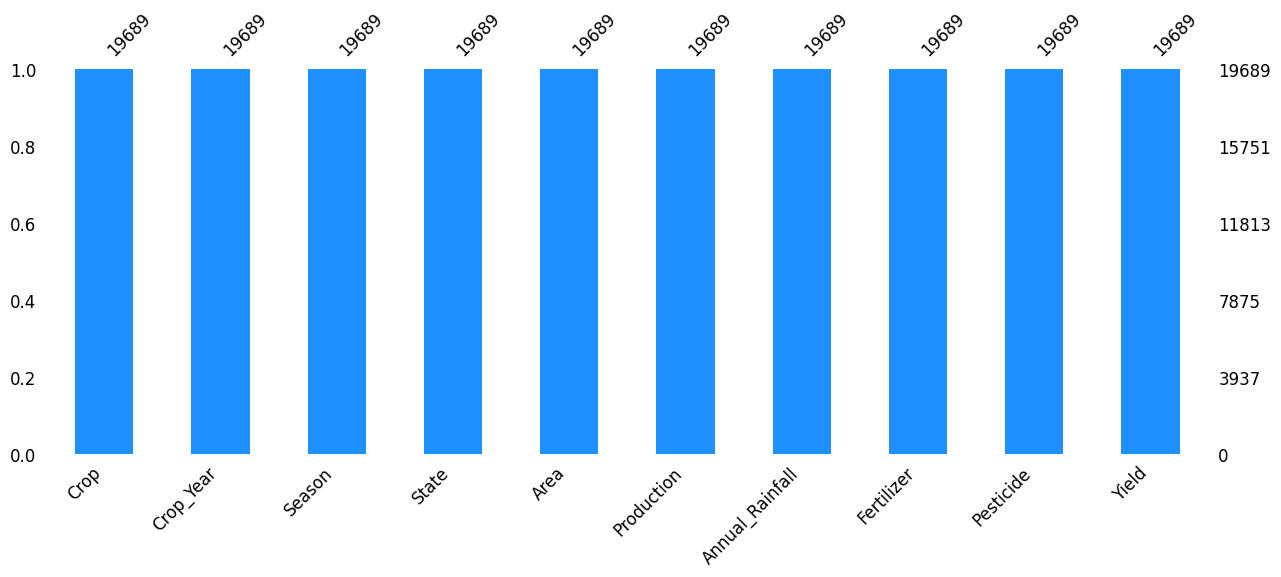

In [14]:
missingno.bar(df, figsize=(15,5), fontsize=12, color='dodgerblue', sort='ascending');
plt.show()

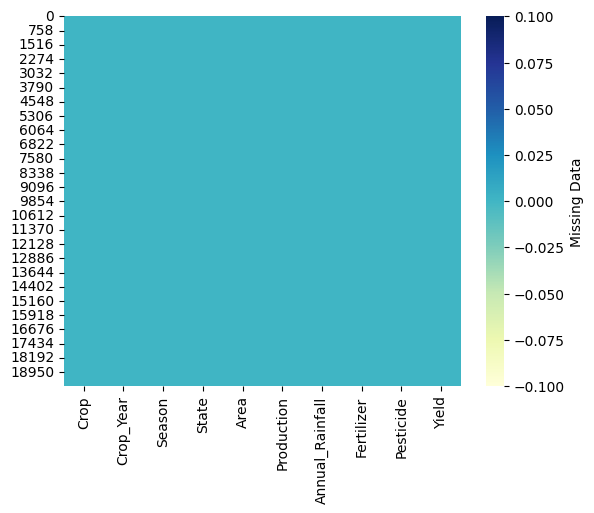

In [15]:
plt.Figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'});

In [16]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,"73,814.00",56708,"2,051.40","7,024,878.38","22,882.34",0.80
1,1997,"6,637.00",4685,"2,051.40","631,643.29","2,057.47",0.71
2,1997,796.00,22,"2,051.40","75,755.32",246.76,0.24
3,1997,"19,656.00",126905000,"2,051.40","1,870,661.52","6,093.36","5,238.05"
4,1997,"1,739.00",794,"2,051.40","165,500.63",539.09,0.42


In [17]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor Seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(Lint),Kharif,Assam


Correlation matrix for numeric columns

In [18]:
numeric_data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00,-0.04,0.00,-0.01,0.01,-0.00,0.00
Area,-0.04,1.00,0.04,-0.11,0.97,0.97,0.00
Production,0.00,0.04,1.00,0.03,0.04,0.04,0.57
Annual_Rainfall,-0.01,-0.11,0.03,1.00,-0.11,-0.10,0.02
Fertilizer,0.01,0.97,0.04,-0.11,1.00,0.95,0.00
Pesticide,-0.00,0.97,0.04,-0.10,0.95,1.00,0.00
Yield,0.00,0.00,0.57,0.02,0.00,0.00,1.00


In [21]:
fig = px.imshow(numeric_data.corr(), text_auto=True, aspect="auto")
fig.show()

NameError: name 'px' is not defined